<a href="https://colab.research.google.com/github/RokelisK123/gilusis/blob/main/AAutoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQk4anYFFsY3OTqb6RP4oTBhqPM0P1u80tSRA&usqp=CAU" width=75 height=50>

*Algirdas Laukaitis*

<br><br>

---



# PART 1

<font color='SeaGreen'>Download and prepare the CIFAR10 dataset</font>        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/PICOL_Download.svg/1024px-PICOL_Download.svg.png" width=100 height=100>


In [35]:
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Expand dimensions to match the model's expected input shape
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = [str(i) for i in range(10)]  # Labels 0-9 for MNIST




In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Resize input data to 32x32 and add channel dimension
train_images_resized = tf.image.resize(train_images, (32, 32))  # Resize to 32x32
train_images_resized = tf.expand_dims(train_images_resized, axis=-1)  # Add grayscale channel
test_images_resized = tf.image.resize(test_images, (32, 32))  # Resize to 32x32
test_images_resized = tf.expand_dims(test_images_resized, axis=-1)  # Add grayscale channel

# Normalize data
train_images_resized = train_images_resized.numpy() / 255.0
test_images_resized = test_images_resized.numpy() / 255.0



<br><br>

---
###<font color='SeaGreen'>Let's plot the first 100 images </font>


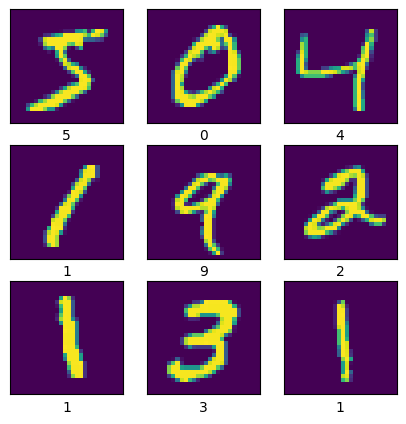

In [37]:
plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])

    # Correct indexing for class_names
    label_index = train_labels[i][0] if train_labels.ndim > 1 else train_labels[i]
    plt.xlabel(class_names[label_index])
plt.show()



<br><br><br><br>


# <font color='SeaGreen'>Convolutional Autoencoder</font>        <img src="https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png" width=400 height=250>

<br><br>

---
###<font color='SeaGreen'>Step 2. Model </font>

In [38]:
from tensorflow.keras.models import Model

In [39]:
from tensorflow.keras import layers, models

input = layers.Input(shape=(32, 32, 1))

# Encoder
x = layers.Conv2D(64, (3, 3), activation="tanh", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="tanh", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Latent space
x = layers.Conv2D(16, (3, 3), activation="tanh", padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="tanh", padding="same")(x)
x = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="tanh", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = models.Model(input, x)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy")
autoencoder.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_8 (Conv2DTranspose) │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_9 (Conv2DTranspose) │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 1)           │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,441 (185.32 KB)

 Trainable params: 47,441 (185.32 KB)

 Non-trainable params: 0 (0.00 B)

<br><br>

---
###<font color='SeaGreen'>Step 3. Train and evaluate the model</font>

In [40]:
history = autoencoder.fit(
    x=train_images_resized,
    y=train_images_resized,
    epochs=30,
    batch_size=64,
    shuffle=True,
    validation_data=(test_images_resized, test_images_resized),
)



Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0488 - val_loss: 0.0045
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 9/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 10/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 11/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 12/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 

In [41]:
decoded_train_imgs = autoencoder.predict(train_images_resized)
decoded_test_imgs = autoencoder.predict(test_images_resized)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


####<font color='SeaGreen'>Evaluate the model</font>

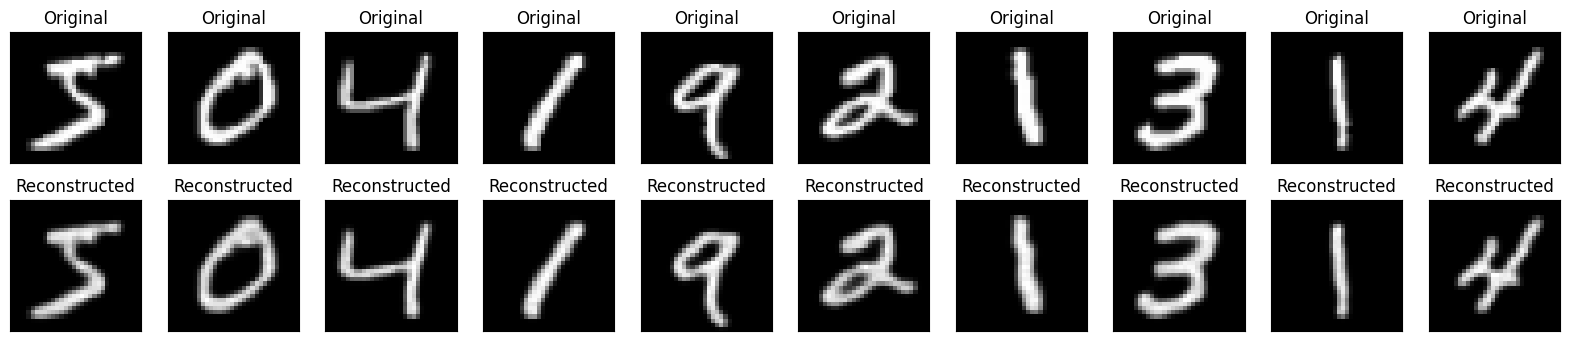

In [42]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images_resized[i].reshape(32, 32), cmap="gray")
    plt.title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_train_imgs[i].reshape(32, 32), cmap="gray")
    plt.title("Reconstructed")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()